In [7]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [8]:
print(tf.__version__)

2.1.0


In [9]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [10]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string


def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [11]:
train_data= pd.read_csv("G:\\Datascience_experiments\\tweet-sentiment-extraction\\train.csv")
train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('===========Train Data =========')
print(train_data['sentiment'].value_counts())
print(len(train_data))
print('==============================')


train_data['text'] = train_data['text'].apply(remove_emoji)
train_data['text'] = train_data['text'].apply(remove_url)
train_data['text'] = train_data['text'].apply(clean_text)


test_data= pd.read_csv("G:\\Datascience_experiments\\tweet-sentiment-extraction\\test.csv")
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]
print('===========Test Data =========')
print(test_data['sentiment'].value_counts())
print(len(test_data))
print('==============================')

test_data['text'] = test_data['text'].apply(remove_emoji)
test_data['text'] = test_data['text'].apply(remove_url)
test_data['text'] = test_data['text'].apply(clean_text)

===========Train Data =========
neutral     10704
positive     8375
negative     7673
Name: sentiment, dtype: int64
26752
===========Test Data =========
neutral     1376
positive    1075
negative     983
Name: sentiment, dtype: int64
3434


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(), train_data['sentiment'].tolist(), test_size=0.33,stratify = train_data['sentiment'].tolist(), random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))

x_train=np.asarray(X_train)
x_valid = np.array(X_valid)
x_test =np.asarray(test_data['text'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['sentiment'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:17923
Class distribution: Counter({'neutral': 7171, 'positive': 5611, 'negative': 5141})
Valid data len:8829
Class distribution: Counter({'neutral': 3533, 'positive': 2764, 'negative': 2532})


In [25]:
train_labels[0]

array([0., 1., 0.], dtype=float32)

In [26]:
x_train[0]

'just getting additional free'

In [13]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'positive', 'negative', 'negative', 'neutral']
Text to number
[1 1 1 2 0 1 2 0 0 1]
Number to category
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [20]:
val=np.array(train_ds)

In [23]:
val

array(<TensorSliceDataset shapes: ((), (3,)), types: (tf.string, tf.float32)>,
      dtype=object)

In [14]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==5:
        break

======Train dataset ====
tf.Tensor(b'just getting additional free', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'also bored school third freelesson freistunde', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'playing society', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'luckyand wife loves', shape=(), dtype=string) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(b'thats kinda mean dont think', shape=(), dtype=string) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
======Validation dataset ====
tf.Tensor(b'thought only with tags outside shirt', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'stillll listening paranoid starting civics homework jonas episode', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'just dropped biscuit', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), d

In [27]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [28]:
print(x_train[:1])
hub_layer(x_train[:1])

['just getting additional free']


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 0.02252544, -1.102936  , -0.45312536,  1.1712923 , -0.9280152 ,
        -1.6799717 , -0.03097978, -0.04522766, -0.69689393, -0.3546787 ,
        -0.9819268 ,  1.3606595 , -0.7599448 ,  0.05979407, -0.71509284,
         0.48663723,  1.3430784 , -1.0147772 ,  0.13958323, -0.14541228]],
      dtype=float32)>

In [29]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='sigmoid'))



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


In [33]:
epochs = 20
# Fit the model using the train and test datasets.we can also use below two formats and both works
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),epochs= epochs,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Train for 141 steps, validate for 69 steps
Epoch 1/20
141/141 [==============================] - 4s 28ms/step - loss: 1.0877 - CategoricalAccuracy: 0.3854 - val_loss: 1.0674 - val_CategoricalAccuracy: 0.4422
Epoch 2/20
141/141 [==============================] - 2s 15ms/step - loss: 1.0447 - CategoricalAccuracy: 0.4812 - val_loss: 1.0191 - val_CategoricalAccuracy: 0.5087
Epoch 3/20
141/141 [==============================] - 2s 17ms/step - loss: 0.9929 - CategoricalAccuracy: 0.5418 - val_loss: 0.9761 - val_CategoricalAccuracy: 0.5561
Epoch 4/20
141/141 [==============================] - 2s 12ms/step - loss: 0.9512 - CategoricalAccuracy: 0.5902 - val_loss: 0.9487 - val_CategoricalAccuracy: 0.5865
Epoch 5/20
141/141 [==============================] - 2s 12ms/step - loss: 0.9199 - CategoricalAccuracy: 0.6249 - val_loss: 0.9295 - val_CategoricalAccuracy: 0.6107
Epoch 6/20
141/141 [==============================] - 2s 15ms/step - loss: 0.8942 - CategoricalAccuracy: 0.6525 - val_loss: 0.9155 -

In [35]:
history.history

{'loss': [1.087430913147833,
  1.0449773343367774,
  0.9924250177750994,
  0.9501546895351686,
  0.9198825562239052,
  0.8952741395819901,
  0.8747705313993512,
  0.8570427332732957,
  0.8415974818828122,
  0.8281171545980764,
  0.8162099028720472,
  0.8056864755491403,
  0.7962259649265985,
  0.7877818654871597,
  0.7801186230534761,
  0.7731316207455969,
  0.7666200786897169,
  0.7609468425303932,
  0.7556001636550036,
  0.7506767141927415],
 'CategoricalAccuracy': [0.38537076,
  0.48116943,
  0.541762,
  0.59024715,
  0.6248954,
  0.6525135,
  0.6743291,
  0.6929085,
  0.71159965,
  0.7269988,
  0.73966414,
  0.74998605,
  0.75874573,
  0.76728225,
  0.7718574,
  0.7804497,
  0.78664285,
  0.7909948,
  0.7958489,
  0.8000893],
 'val_loss': [1.0673670388650203,
  1.0191293704336968,
  0.976123905700186,
  0.948688148588374,
  0.9295301653336787,
  0.9155476594316787,
  0.9042775224948275,
  0.8960375379824984,
  0.8898616156716278,
  0.8859297287636909,
  0.8827634531518688,
  0.8807

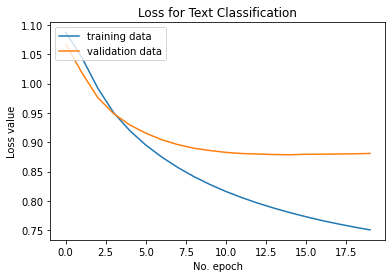

In [36]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

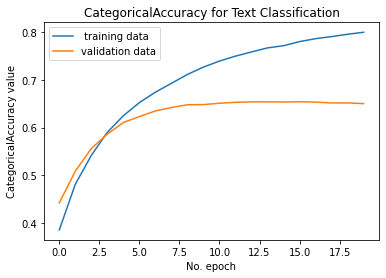

In [37]:
plt.plot(history.history['CategoricalAccuracy'], label=' training data')
plt.plot(history.history['val_CategoricalAccuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=regularizers.l2(0.05)))



model1.summary()
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 60

# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Train for 141 steps, validate for 69 steps
Epoch 1/60
141/141 [==============================] - 4s 31ms/step - loss: 1.7121 - CategoricalAccuracy: 0.3530 - val_loss: 1.4651 - val_CategoricalAccuracy: 0.3912
Epoch 2/60
141/141 [==============================] - 2s 15ms/step - loss: 1.3359 - CategoricalAccuracy: 0.3878 - val_loss: 1.2327 - val_CategoricalAccuracy: 0.4003
Epoch 3/60
141/141 [==============================] - 2s 13ms/step - loss: 1.1794 - CategoricalAccuracy: 0.4073 - val_loss: 1.1392 - val_CategoricalAccuracy: 0.4002
Epoch 4/60
141/141 [==============================] - 2s 17ms/step - loss: 1.1199 - CategoricalAccuracy: 0.4028 - val_loss: 1.1061 - val_CategoricalAccuracy: 0.4002
Epoch 5/60
141/141 [==============================] - 2s 12ms/step - loss: 1.0994 - CategoricalAccuracy: 0.4011 - val_loss: 1.0950 - val_CategoricalAccuracy: 0.4002
Epoch 6/60
141/141 [==============================] - 2s 11ms/step - loss: 1.0927 - CategoricalAccuracy: 0.4013 - val_loss: 1.0909 -

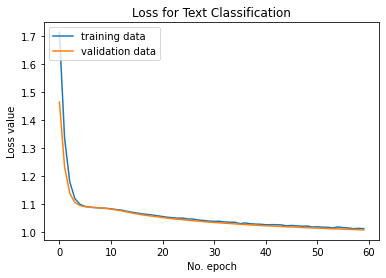

In [40]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

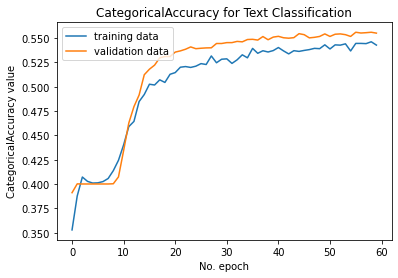

In [41]:
plt.plot(history1.history['CategoricalAccuracy'], label='training data')
plt.plot(history1.history['val_CategoricalAccuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [42]:
print("Evaluate on test data")
results = model1.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model1.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
3434/3434 [==============================] - 1s 324us/sample - loss: 1.0022 - CategoricalAccuracy: 0.5617
test loss, test acc: [1.0022331771284048, 0.5617356]
Generate predictions for all samples
[[0.51791644 0.8436407  0.26053014]
 [0.0653129  0.4115043  0.88725233]
 [0.69651276 0.9024918  0.13038768]
 ...
 [0.73550636 0.91259444 0.10824493]
 [0.05382691 0.3718574  0.9089289 ]
 [0.07800186 0.44946277 0.8631815 ]]


In [43]:
print(predict_results)

[1 2 1 ... 1 2 2]


In [44]:
test_data['pred_sentiment']= predict_results
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 0),'negative',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '1'),'neutral',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '2'),'positive',test_data.pred_sentiment)

In [45]:
test_data.head(20)

,textID,text,sentiment,Num_words_text,pred_sentiment
0,f87dea47db,last session,neutral,6,neutral
1,96d74cb729,shanghai also really exciting precisely skyscr...,positive,15,positive
2,eee518ae67,recession veronique branquinho quit company su...,negative,13,neutral
4,33987a8ee5,like,positive,5,neutral
5,726e501993,thats great weee visitors,positive,4,positive
6,261932614e,think everyone hates here,negative,8,neutral
7,afa11da83f,soooooo wish could school myspace completely b...,negative,13,neutral
8,e64208b4ef,within short time last clue them,neutral,12,neutral
9,37bcad24ca,what alright havent done anything leaving soon...,neutral,18,neutral
10,24c92644a4,bike holdshould have known that argh total bummer,negative,12,neutral


In [46]:
from sklearn.metrics import classification_report
labels = ['positive', 'negative','neutral']
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

    positive       0.82      0.62      0.71      1075
    negative       0.00      0.00      0.00       983
     neutral       0.48      0.92      0.63      1376

    accuracy                           0.56      3434
   macro avg       0.43      0.51      0.45      3434
weighted avg       0.45      0.56      0.47      3434



G:\New folder\envs\pyfor\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
model1.save('G:\\Datascience_experiments\\tweet-sentiment-extraction\\tf_hub_neuralnet_model.h5')